# 1.0 - Data Exploration

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# RAW_DATA = '../data/raw/KDD-cup-data/corrected/corrected'
RAW_DATA = '../data/raw/KDD-cup-data/kddcup.data.corrected'
NAMES = '../data/raw/KDD-cup-data/kddcup.names'
TRAINING_ATTACK_TYPES = '../data/raw/KDD-cup-data/training_attack_types'
DATA_10_PERCENT = '../data/raw/KDD-cup-data/kddcup.data_10_percent_corrected'

## Importing Data

In [3]:
raw_data = pd.read_csv(DATA_10_PERCENT, header=None)
names = pd.read_csv(NAMES, header=None, sep=':', skiprows=1)

In [4]:
raw_data.columns = names[0].tolist() + ['label']
print(f"{raw_data.shape = }")
raw_data.head()

raw_data.shape = (494021, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
attack_types = pd.read_csv(TRAINING_ATTACK_TYPES, header=None, sep=' ')
attack_types_dict = dict(zip(attack_types[0], attack_types[1]))
attack_types_dict

{'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'multihop': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'rootkit': 'u2r',
 'satan': 'probe',
 'smurf': 'dos',
 'spy': 'r2l',
 'teardrop': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l'}

**Back DOS (Denial of Service):** A type of DOS attack where the attacker floods the target system with traffic, overwhelming its resources and making it unable to respond to legitimate requests.

**Buffer Overflow (U2R - User to Root):** This occurs when a program tries to write more data to a buffer (temporary data storage area) than it was intended to hold, potentially leading to code execution or system compromise.

**FTP Write (R2L - Remote to Local):** Unauthorized access to an FTP server to write files, typically for malicious purposes.

**Guess Password (R2L):** Attempting to gain unauthorized access to a system by guessing passwords.

In [6]:
raw_data['label'] = raw_data['label'].map(lambda x: x.strip('.'))
raw_data['attack_type'] = raw_data['label'].map(lambda x: attack_types_dict[x] if x in attack_types_dict else x)

In [7]:
raw_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,normal


In [8]:
raw_data.info(), raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

(None,
             duration     src_bytes     dst_bytes           land  \
 count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
 mean       47.979302  3.025610e+03  8.685324e+02       0.000045   
 std       707.746472  9.882181e+05  3.304000e+04       0.006673   
 min         0.000000  0.000000e+00  0.000000e+00       0.000000   
 25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
 50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
 75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
 max     58329.000000  6.933756e+08  5.155468e+06       1.000000   
 
        wrong_fragment         urgent            hot  num_failed_logins  \
 count   494021.000000  494021.000000  494021.000000      494021.000000   
 mean         0.006433       0.000014       0.034519           0.000152   
 std          0.134805       0.005510       0.782103           0.015520   
 min          0.000000       0.000000       0.000000           0.000000   
 25%

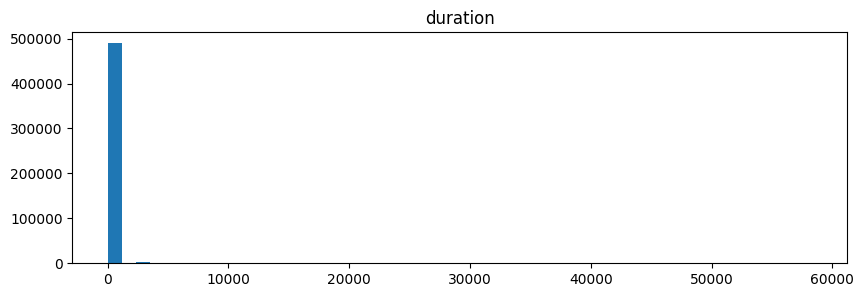

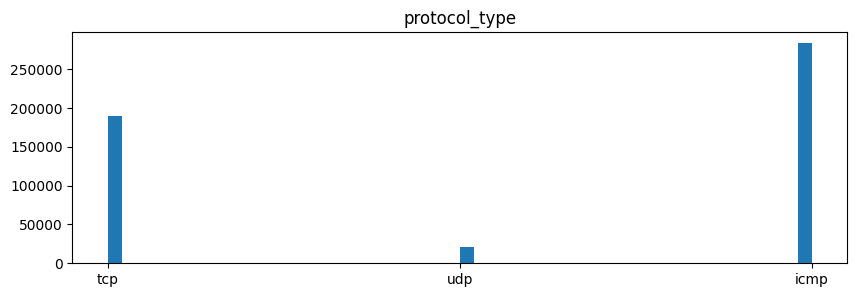

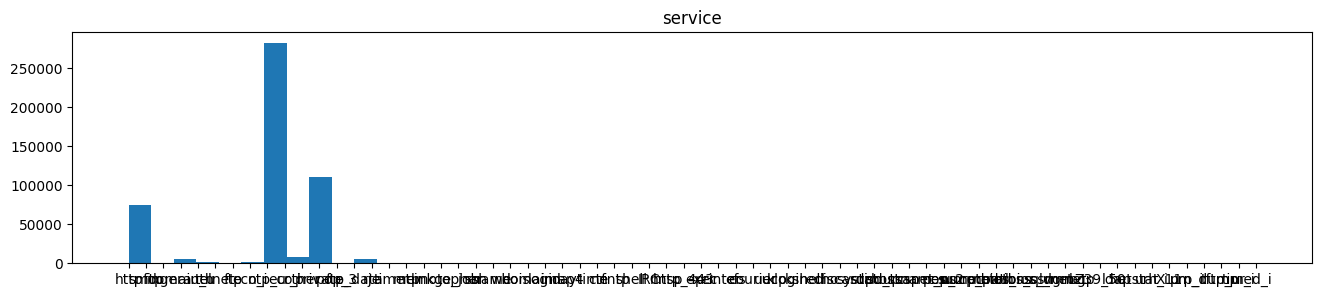

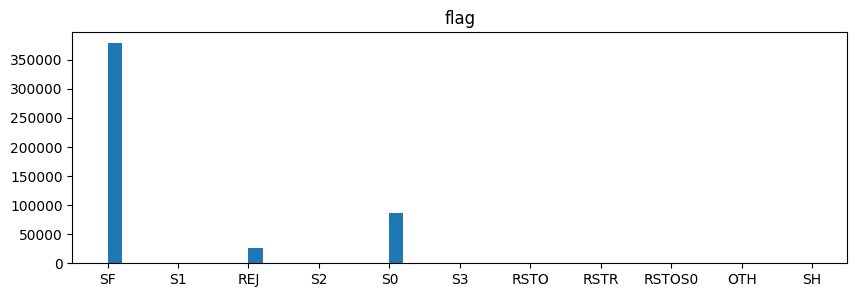

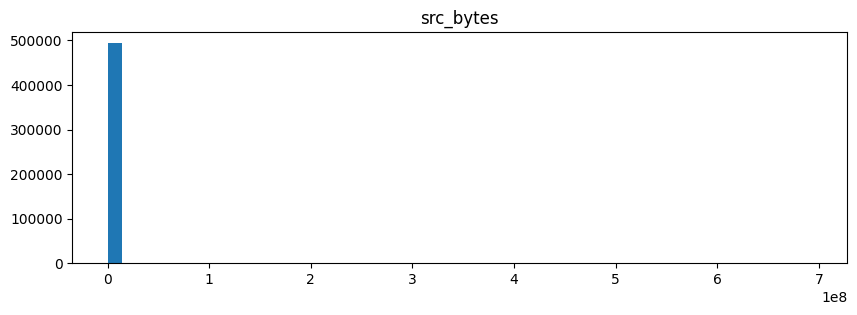

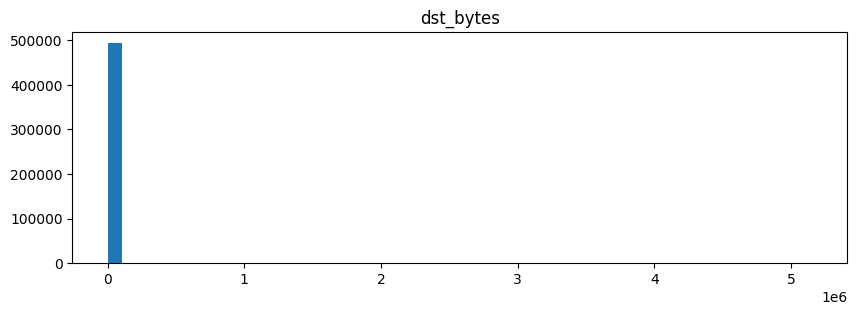

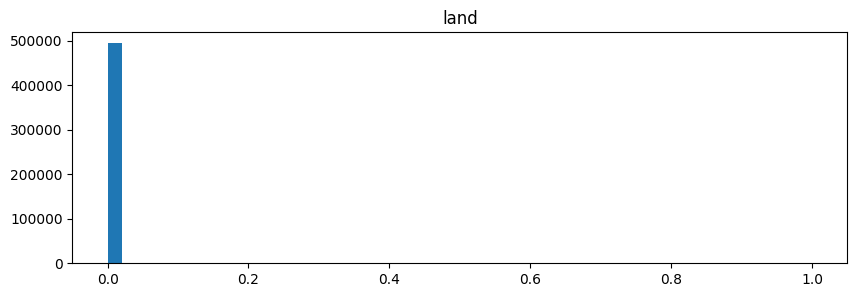

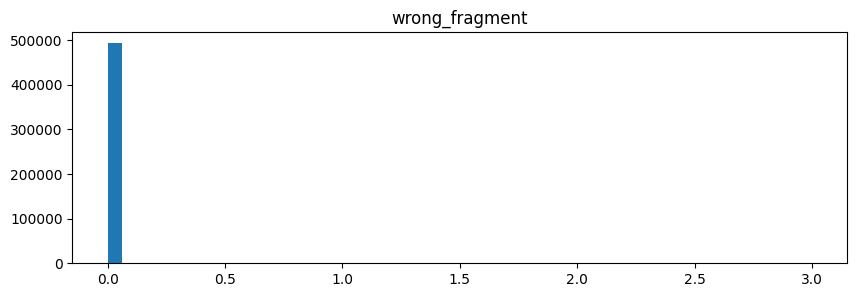

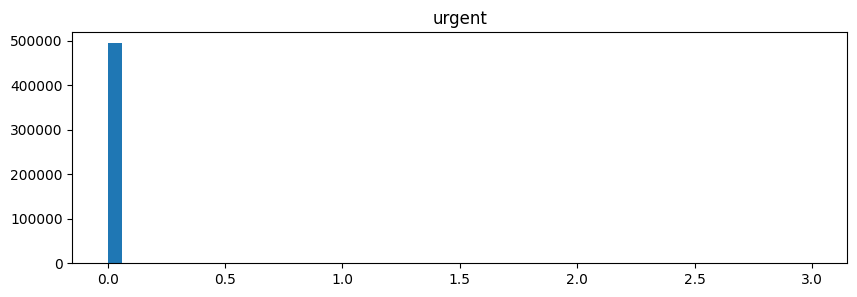

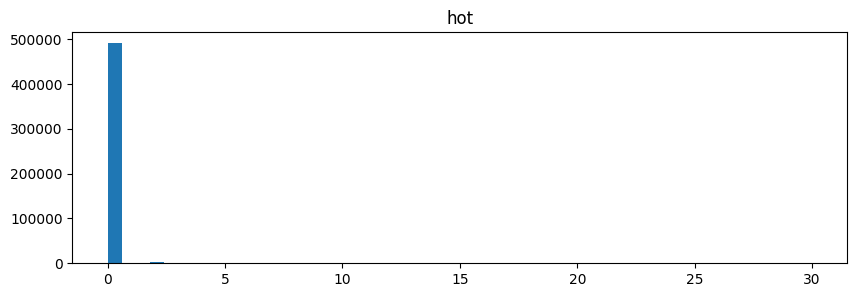

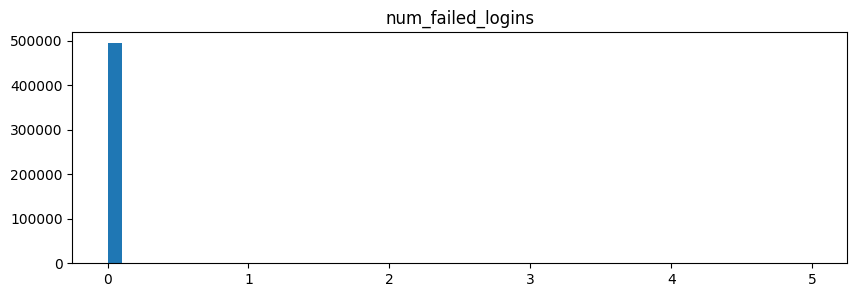

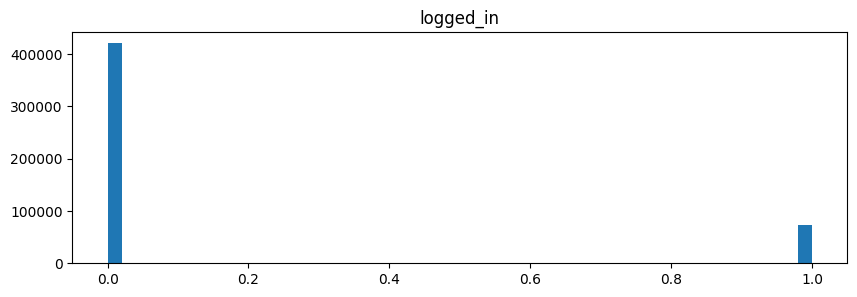

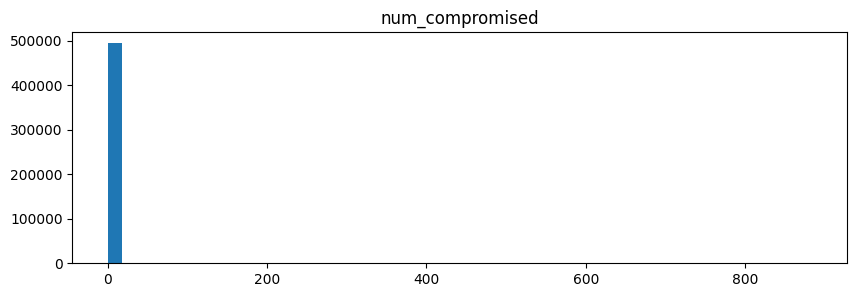

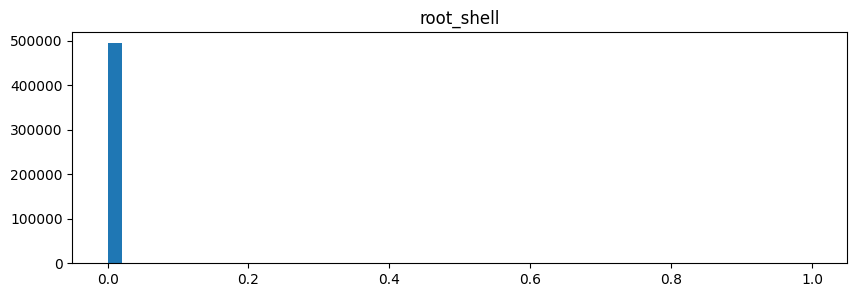

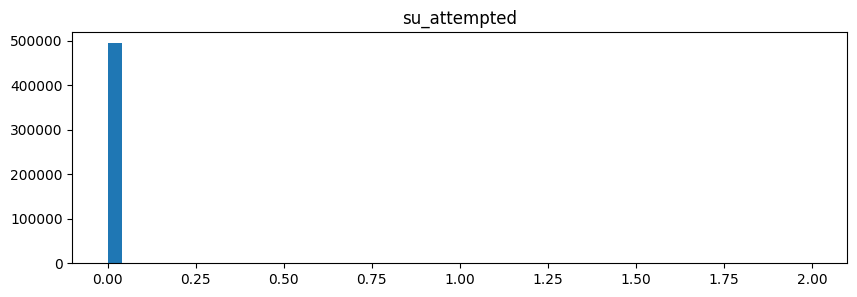

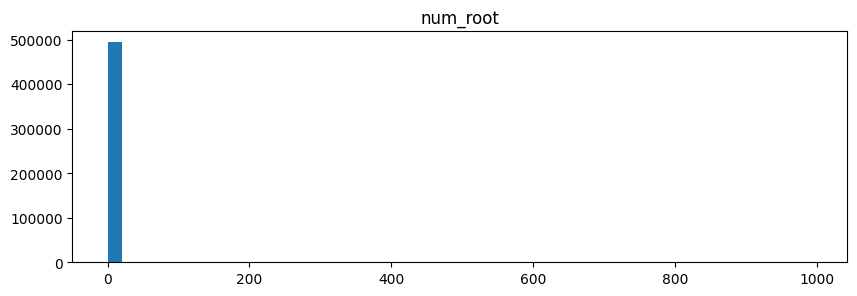

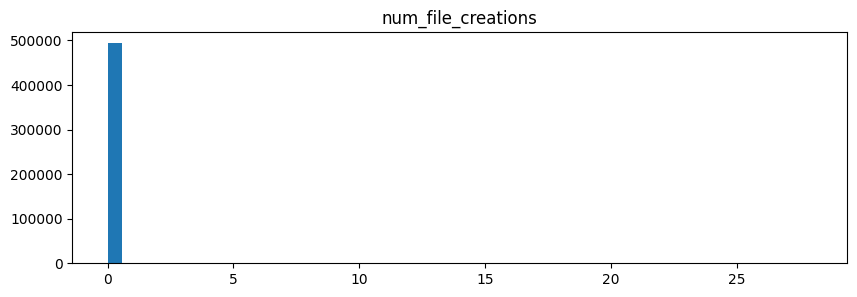

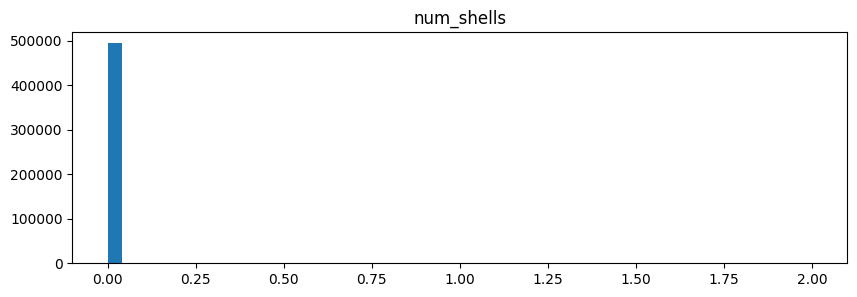

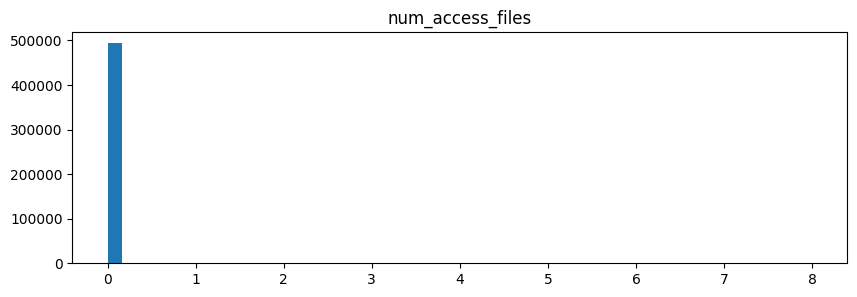

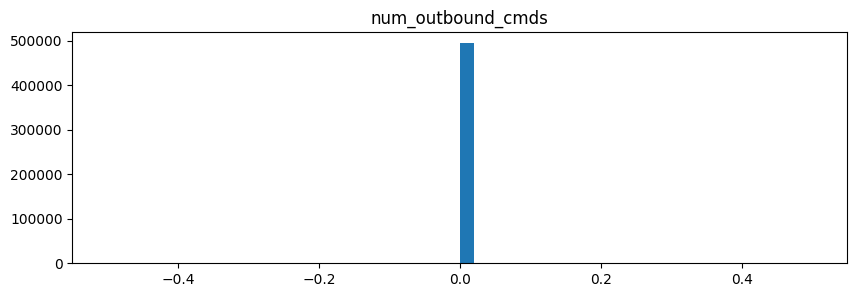

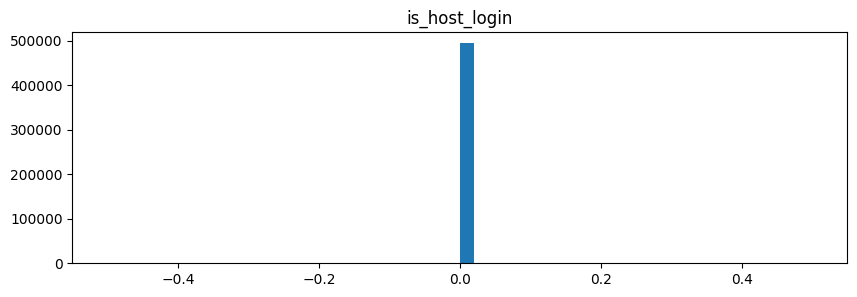

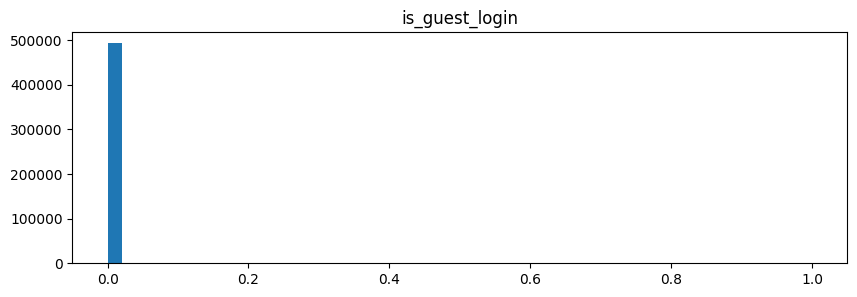

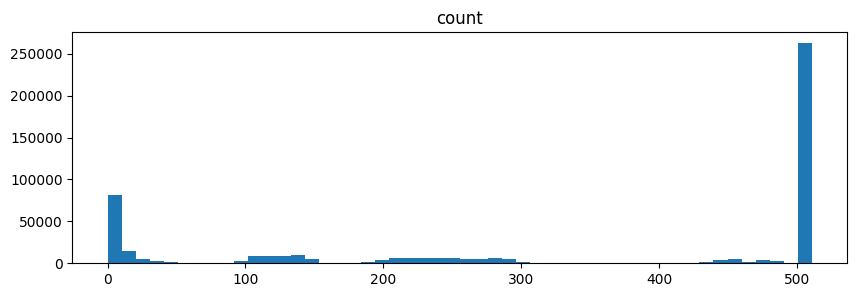

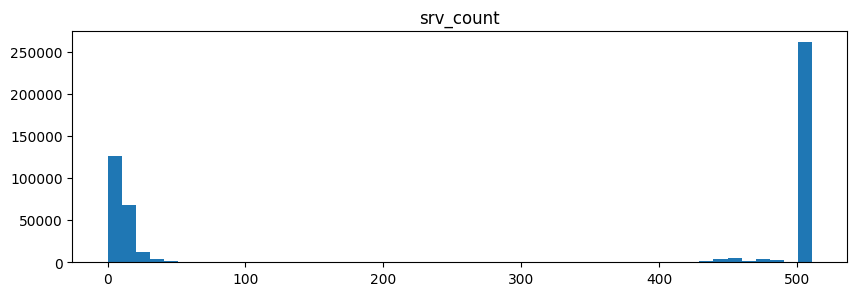

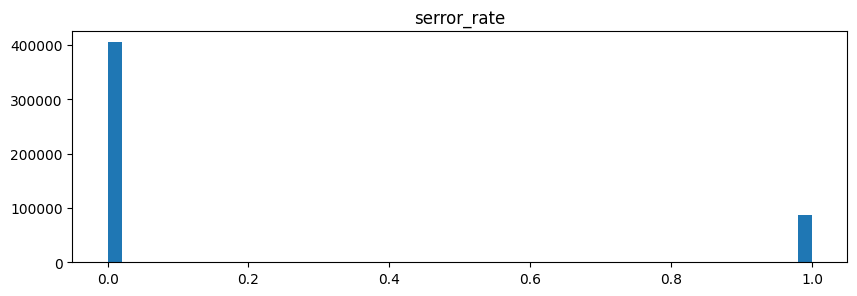

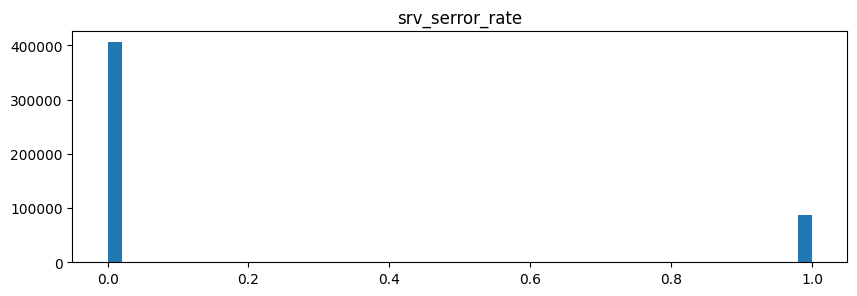

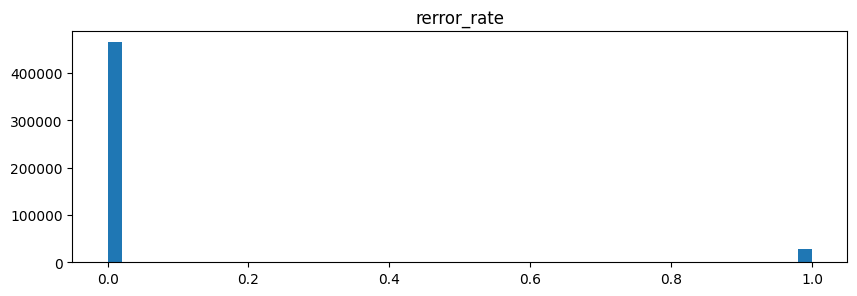

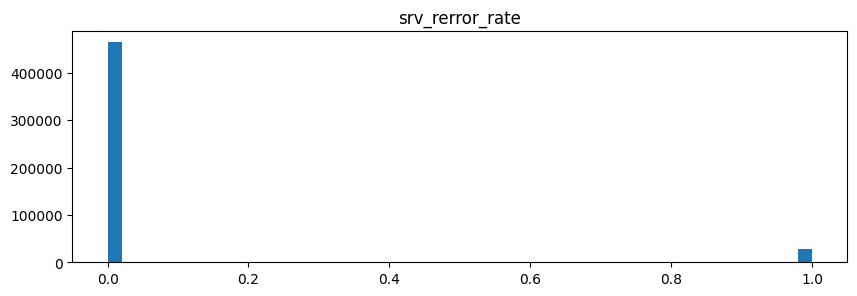

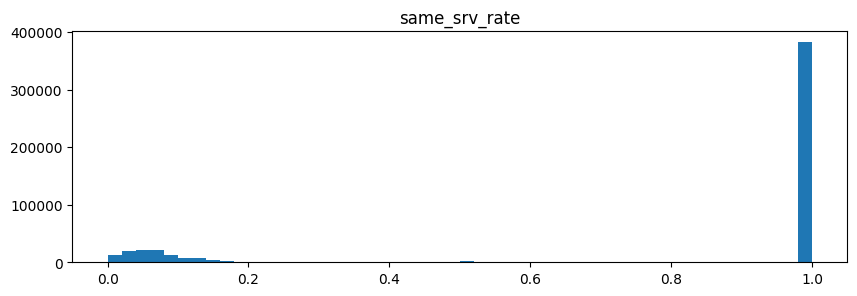

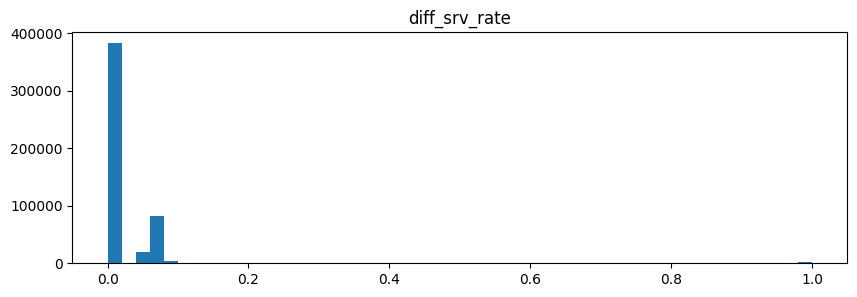

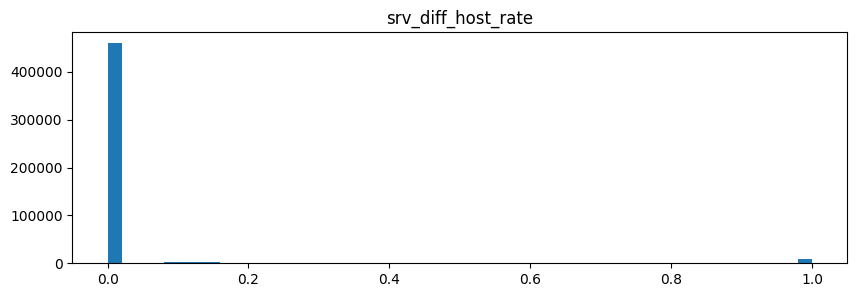

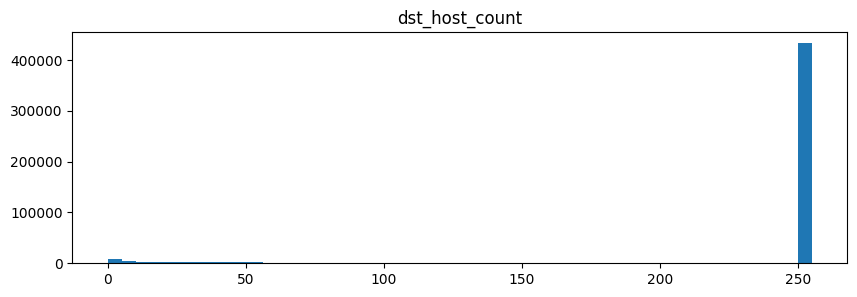

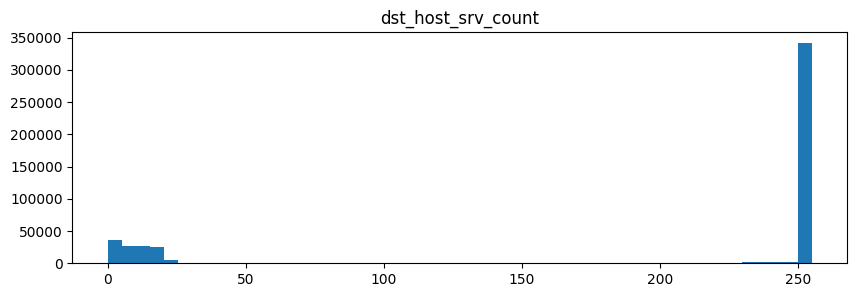

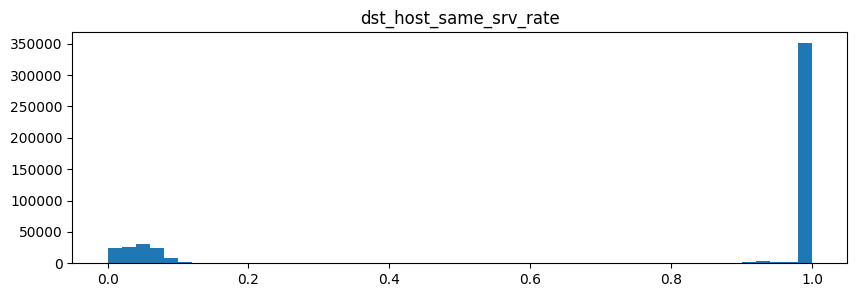

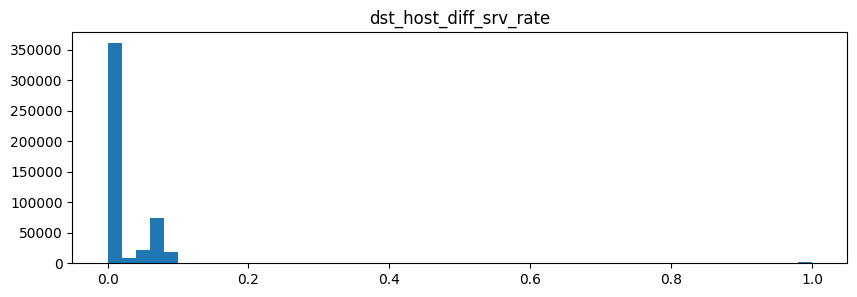

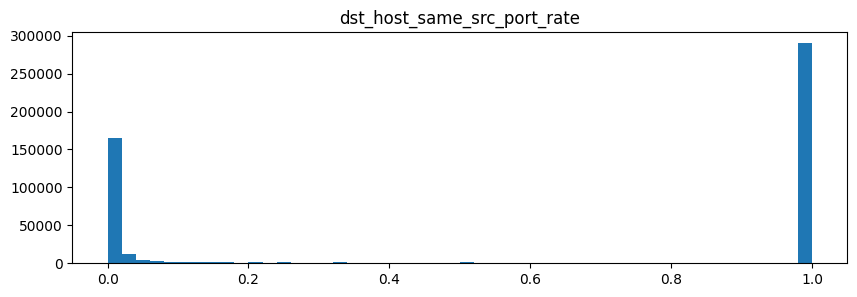

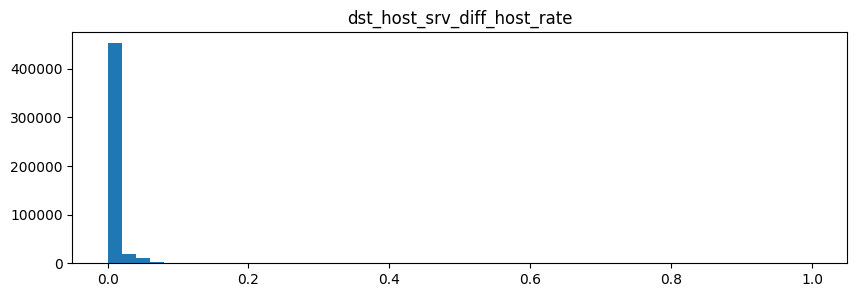

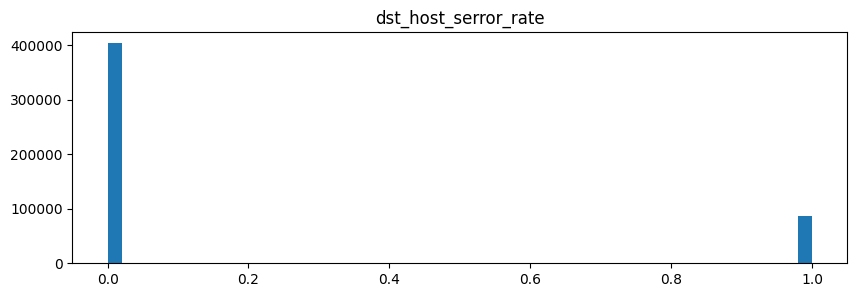

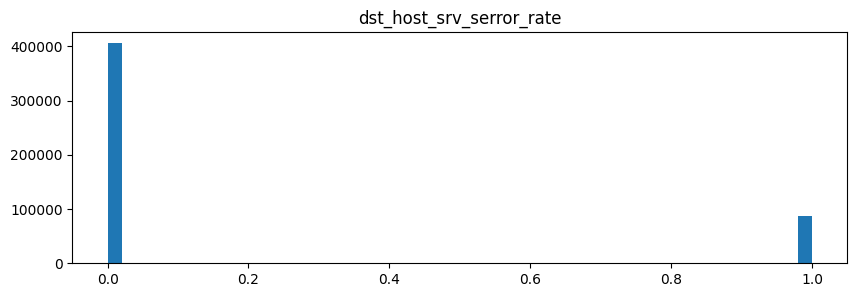

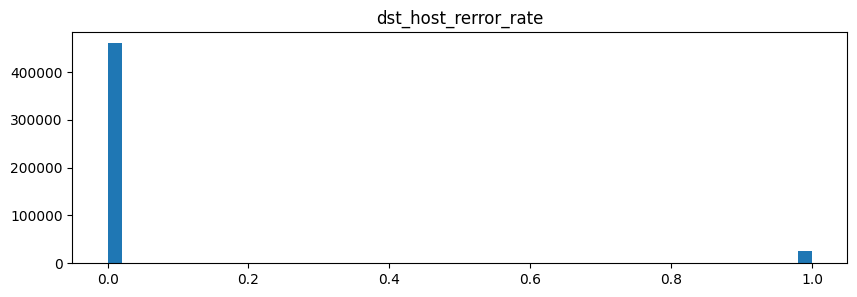

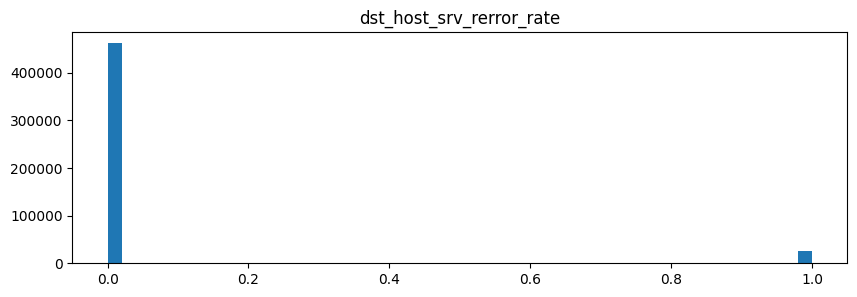

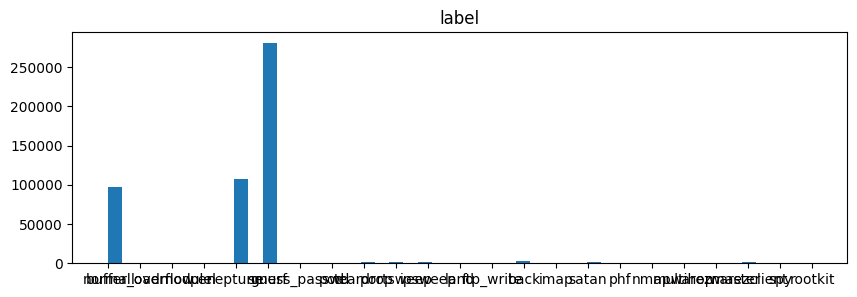

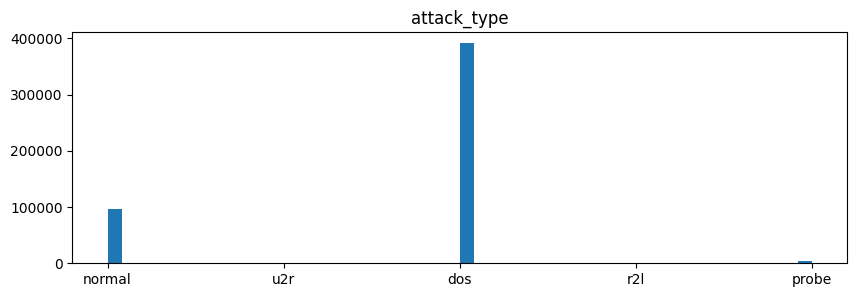

In [9]:
for column in raw_data.columns:
    plt.figure(figsize=(10, 3)) if column != 'service' else plt.figure(figsize=(16, 3))
    plt.hist(raw_data[column], bins=50)
    plt.title(column)
    plt.show()

In [11]:
raw_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

---

In [9]:
# categorical columns
cat_columns = raw_data.select_dtypes(exclude=['int64', 'float64']).columns.to_list()
cat_columns.remove('attack_type')
cat_columns.remove('label')
cat_columns

['protocol_type', 'service', 'flag']

In [65]:
def plot_bar(data, column: str, title, width=800, height=900, color=px.colors.sequential.Mint_r):
    categories = data[column].value_counts().reset_index()
    categories.columns = [column, 'count']
    categories = categories.astype({'count': float})

    # color = px.colors.sequential.Magenta
    # color = px.colors.sequential.Mint_r
    fig = px.bar(categories, y=column, x='count', 
                    title=title, 
                    color='count',
                    color_continuous_scale=color, template='plotly_dark')
    fig.update_yaxes(tickfont=dict(size=10))
    fig.update_layout(width=width, height=height)
    # fig.write_image(FIG_PATH + "category_distribution.svg")
    fig.show();
    return fig

In [12]:
fig = plot_bar(raw_data, 'protocol_type', 'Protocol Type Distribution', width=800, height=400)
fig.write_image('../figures/protocol_type_distribution.svg')

In [13]:
fig = plot_bar(raw_data, 'service', 'Service Distribution', width=800, height=900)
fig.write_image('../figures/service_distribution.svg')

In [72]:
fig = plot_bar(raw_data, 'flag', 'Flag Distribution', width=800, height=400)
fig.write_image('../figures/flag_distribution.svg')

In [76]:
fig = plot_bar(raw_data, 'label', 'Attack Type Distribution', width=500, height=400)
fig.write_image('../figures/attack_type_distribution.jpg')

# fig = plot_bar(raw_data, 'attack_type', 'Attack Type Category Distribution', width=600, height=600)
#fig.write_image('../figures/attack_type_category_distribution.svg')

---

In [58]:
raw_data.shape

(494021, 43)

In [10]:
nunique_cols = raw_data.columns[raw_data.nunique() > 1].tolist()
df = raw_data[nunique_cols] # drop columns with only 1 unique value
df.shape

(494021, 41)

We dropped the columns `num_outbound_cmds` and `is_host_login`, because they only have one unique value.

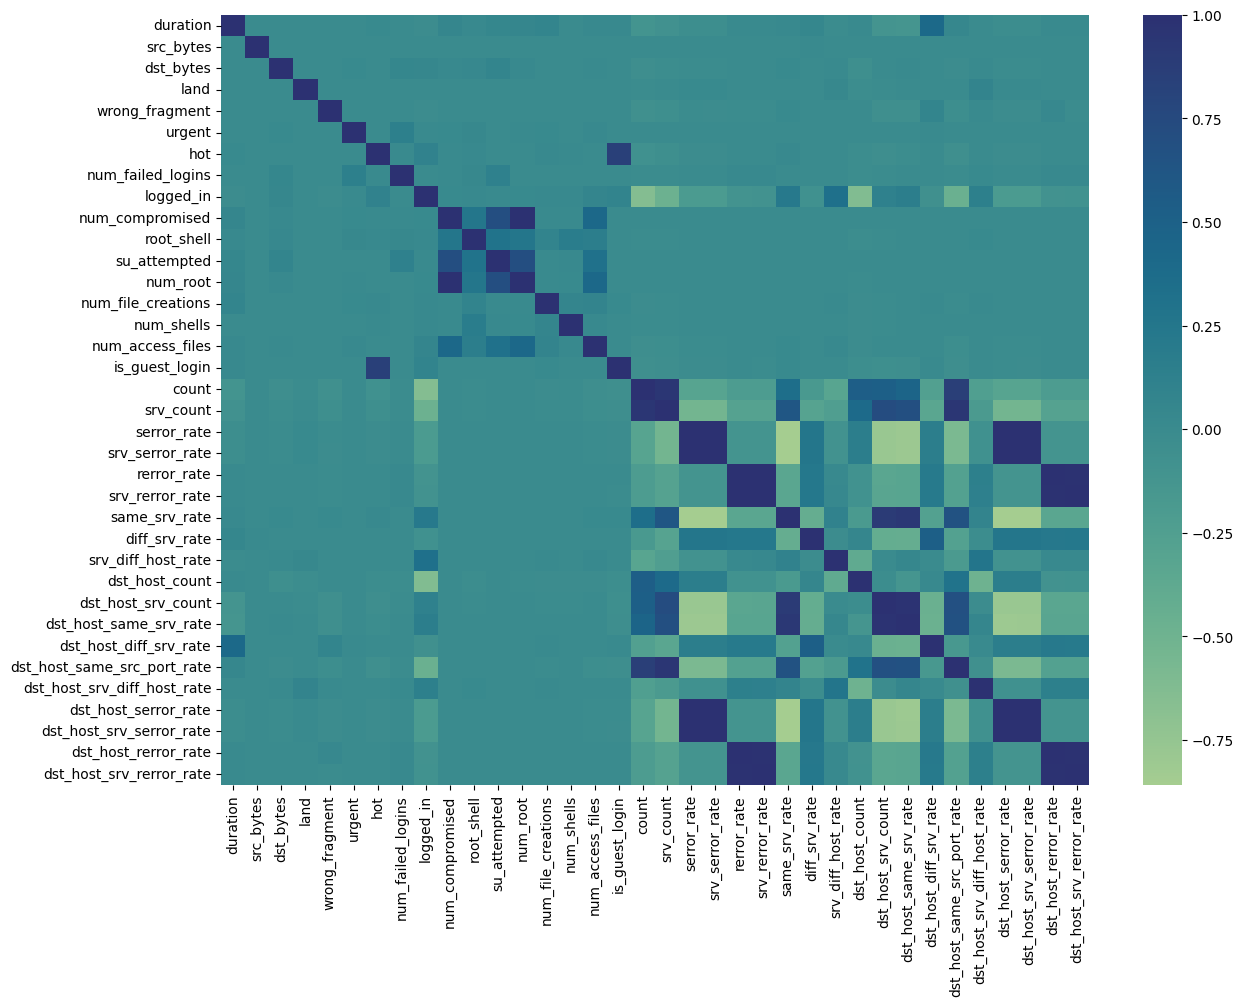

In [22]:
df_num = df.select_dtypes(include=['int64', 'float64'])
corr = df_num.corr()
plt.figure(figsize=(14,10))

sns.heatmap(corr, cmap='crest')

plt.show()

---

In [78]:
threshold = 0.95
highly_correlated = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname1, colname2 = corr.columns[i], corr.columns[j]
            highly_correlated.append((colname1, colname2, corr.iloc[i, j]))
            
for col1, col2, corr_value in highly_correlated:
    print(f"{col1:27s} and {col2:27s} have correlation of {corr_value:.4f}")

num_root                    and num_compromised             have correlation of 0.9938
srv_serror_rate             and serror_rate                 have correlation of 0.9984
srv_rerror_rate             and rerror_rate                 have correlation of 0.9947
dst_host_same_srv_rate      and dst_host_srv_count          have correlation of 0.9737
dst_host_serror_rate        and serror_rate                 have correlation of 0.9987
dst_host_serror_rate        and srv_serror_rate             have correlation of 0.9978
dst_host_srv_serror_rate    and serror_rate                 have correlation of 0.9978
dst_host_srv_serror_rate    and srv_serror_rate             have correlation of 0.9993
dst_host_srv_serror_rate    and dst_host_serror_rate        have correlation of 0.9982
dst_host_rerror_rate        and rerror_rate                 have correlation of 0.9870
dst_host_rerror_rate        and srv_rerror_rate             have correlation of 0.9822
dst_host_srv_rerror_rate    and rerror_rate

In [22]:
# testing significance of correlation using p-value
from scipy.stats import pearsonr
# Calculate the correlation coefficient and p-value
for col1, col2, _ in highly_correlated:
    corr_coef, p_value = pearsonr(df[col1], df[col2])

    # Print the correlation coefficient and p-value
    print(f"Correlation coefficient between {col1:27s} and {col2:27s}: {corr_coef:.4f}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print(f"The correlation between {col1} and {col2} is statistically significant\n")


Correlation coefficient between num_root                    and num_compromised            : 0.9938
P-value: 0.0
The correlation between num_root and num_compromised is statistically significant

Correlation coefficient between srv_serror_rate             and serror_rate                : 0.9984
P-value: 0.0
The correlation between srv_serror_rate and serror_rate is statistically significant

Correlation coefficient between srv_rerror_rate             and rerror_rate                : 0.9947
P-value: 0.0
The correlation between srv_rerror_rate and rerror_rate is statistically significant

Correlation coefficient between dst_host_same_srv_rate      and dst_host_srv_count         : 0.9737
P-value: 0.0
The correlation between dst_host_same_srv_rate and dst_host_srv_count is statistically significant

Correlation coefficient between dst_host_serror_rate        and serror_rate                : 0.9987
P-value: 0.0
The correlation between dst_host_serror_rate and serror_rate is statistically si

In [23]:
col2_variables = [col2 for _, col2, _ in highly_correlated]
df.drop(col2_variables, axis=1, inplace=True)
df.shape

/var/folders/15/wc5q4q7x74s558bh7r8mp75c0000gn/T/ipykernel_23388/2901502364.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(494021, 33)

In [25]:
df_std = df_num.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
dst_host_srv_rerror_rate            0.230140
dst_host_rerror_rate                0.230590
rerror_rate                         0.231623
srv_rerror_rate                     0.232147
logged_in                           0.355345
dst_host_serror_rate                0.380593
serror_rate                         0.380717
dst_host_srv_serror_rate            0.380919
srv_serror

In [59]:
df.shape
df.to_csv('../data/processed/kddcup_data_preprocessed.csv', index=False)

---